**Задание 3.7**
Какая форма (количество строк и столбцов) будет у нашего датасета о стоимости автомобилей после кодировки номинальных признаков однократным методом?

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx.

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [3]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [4]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений признака {}: '.format(column), data[column].nunique())

Число уникальных значений признака cylinders:  6
Число уникальных значений признака title_status:  5
Число уникальных значений признака transmission:  3
Число уникальных значений признака drive:  3
Число уникальных значений признака size:  4


In [5]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

data_onehot = pd.DataFrame(data_onehot, index = data.index, columns=column_names)
data_new = pd.concat([data, data_onehot], axis=1)
data_new = data_new.drop(columns=columns_to_change, axis=1)
data_new.shape

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


**Задание 4.5**
Вставьте найденную замену на место пропусков в столбце weather. Используйте тот же метод для заполнения пропусков в size. Обратите внимание на то, какой тип модели нужен (классификация или регрессия) в зависимости от типа признака.

**Задание 5.2**
Отмасштабируйте признак price с помощью RobustScaler.

In [1]:
import pandas as pd 
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [3]:
data = data[['price', 'year']] 
data.dropna(inplace = True)

In [4]:
data_scaled = data.copy() 
col_names = ['price'] 
x = data_scaled[col_names]

In [5]:
rs_scaler = RobustScaler()

data_scaled[col_names] = rs_scaler.fit_transform(x.values) 


In [15]:
data_scaled['price'][1]

0.17125

**Задание 6.1**
Преобразуйте распределение признаков condition и cylinders в равномерное. Какое значение признака condition получится у нулевого объекта? Ответ округлите до второго знака после точки-разделителя.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [19]:
data = pd.read_excel('data/data_ford_price.xlsx') 

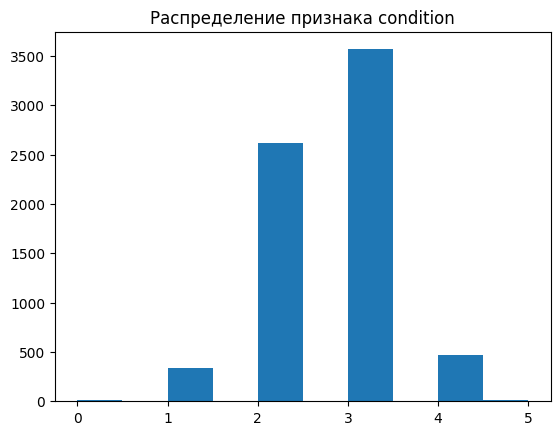

In [20]:
plt.hist(data.condition)
plt.title('Распределение признака condition');

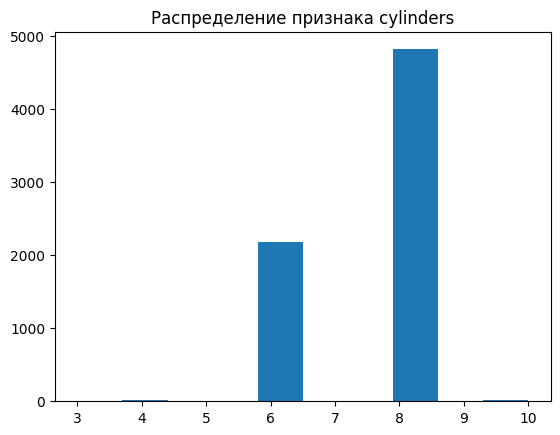

In [21]:
plt.hist(data.cylinders)
plt.title('Распределение признака cylinders');

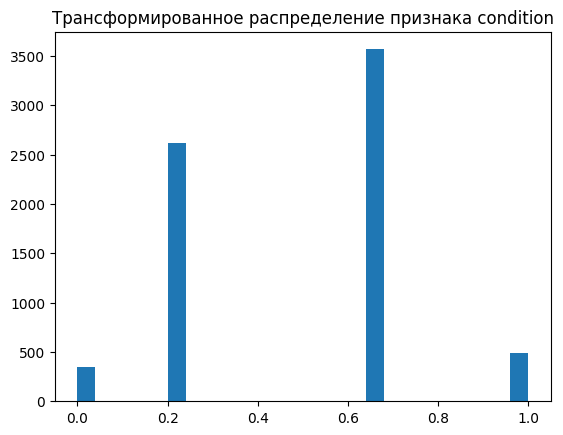

In [22]:
data_for_transform_condition = data['condition'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='uniform')
data_transformed_condition = quantile.fit_transform(data_for_transform_condition)
 
plt.hist(data_transformed_condition, bins=25)
plt.title('Трансформированное распределение признака condition')
plt.show()

In [23]:
round(data_transformed_condition[0][0], 2)

0.96

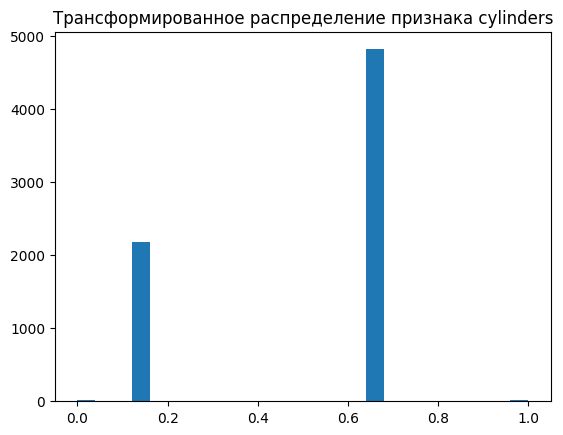

In [24]:
data_for_transform_cylinders = data['cylinders'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='uniform')
data_transformed_cylinders = quantile.fit_transform(data_for_transform_cylinders)
 
plt.hist(data_transformed_cylinders, bins=25)
plt.title('Трансформированное распределение признака cylinders')
plt.show()

**Задание 6.3**
Какое значение признака transformed_price имеет последний объект? Ответ округлите до одного знака после точки-разделителя.

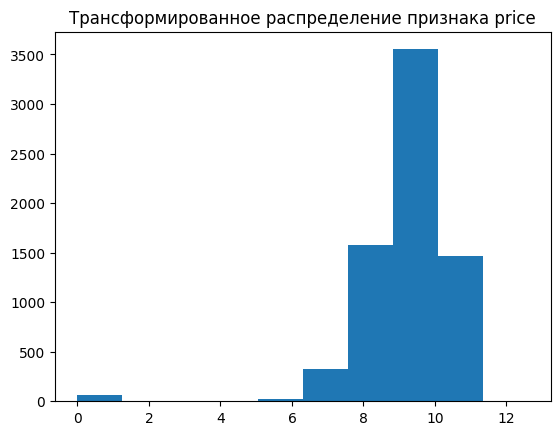

In [25]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [26]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)

In [34]:
round(price_data['transformed_price'].tail(1), 2)

7016    9.8
Name: transformed_price, dtype: float64

**Задание 7.2**
Найдите почтовый код шестого объекта выборки.

In [1]:
from geopy.geocoders import Nominatim

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [5]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [6]:
#Создаём объект Nominatim и инициализируем API Nominatim с помощью параметра geoapiExercises.

geolocator = Nominatim(user_agent="geoapiExercises")

In [7]:
# Объединим широту и долготу для поиска адреса нулевого объекта:

Latitude = str(data['lat'][5])
Longitude =  str(data['long'][5])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

E&J Motors, Southeast Washington Street, Montavilla, Portland, Multnomah County, Oregon, 98215, United States


In [9]:
# Теперь получим информацию из данного списка и преобразуем её в словарь с помощью функции raw():

address = location.raw['address']
address['postcode']

'98215'